In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Harvey/Downloads/animelists_cleaned.csv")
df.head(2)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN


In [2]:
df.tail(2)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN
31284029,hinogurl_mikha,1744,58,0000-00-00,0000-00-00,10,1,0.0,0,2008-04-05 11:36:20,NaN


In [3]:
df.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128403e+07,3.128403e+07,3.128403e+07,3.128403e+07,2.440578e+07,3.128403e+07
mean,1.170326e+04,1.289615e+01,4.652315e+00,3.008111e+00,7.903045e-04,1.832994e-01
std,1.134844e+04,3.733380e+01,3.931615e+00,1.730421e+00,2.810124e-02,1.009172e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

display(df.info())
display(df.describe().columns)
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


None

Index(['anime_id', 'my_watched_episodes', 'my_score', 'my_status',
       'my_rewatching', 'my_rewatching_ep'],
      dtype='object')

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags'],
      dtype='object')

In [5]:
# look at numeric and categorical values separately 
df_num = df[['anime_id', 'my_watched_episodes', 'my_score', 'my_status',
       'my_rewatching', 'my_rewatching_ep']]

df_cat = df[['username','my_start_date','my_finish_date','my_last_updated','my_tags']]

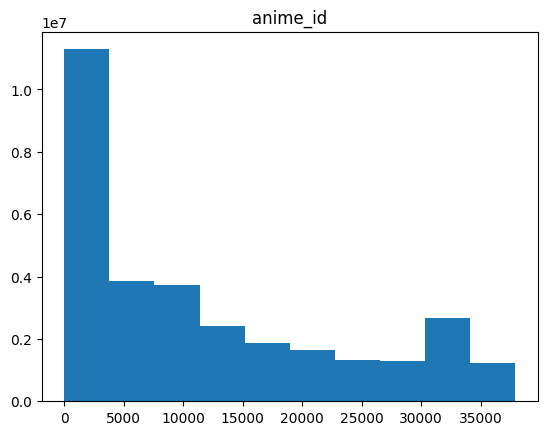

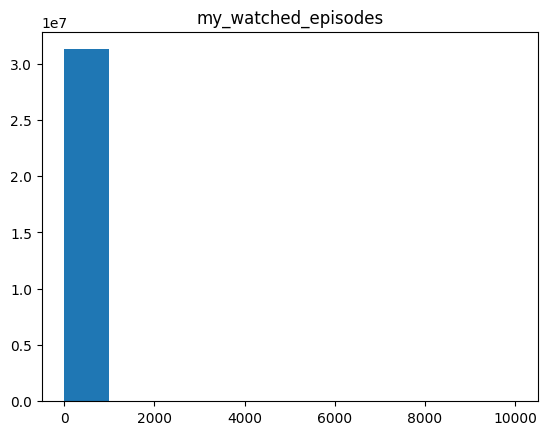

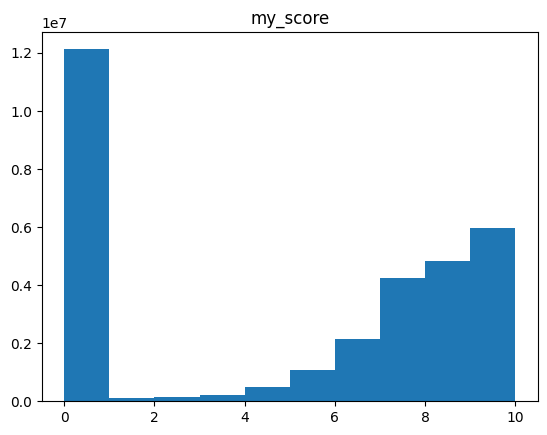

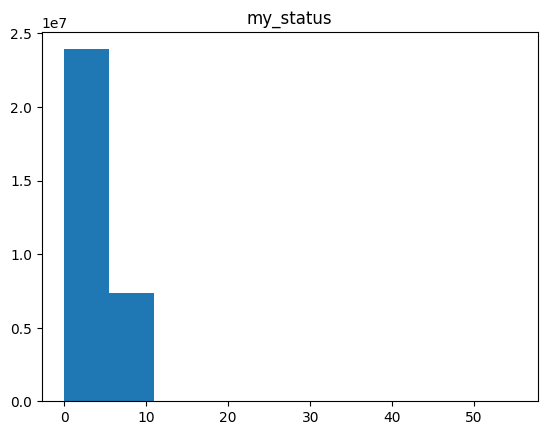

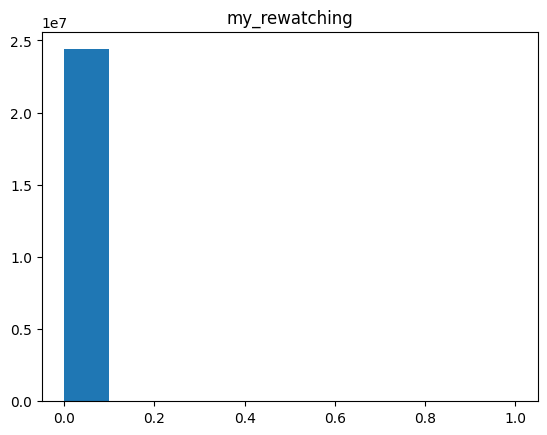

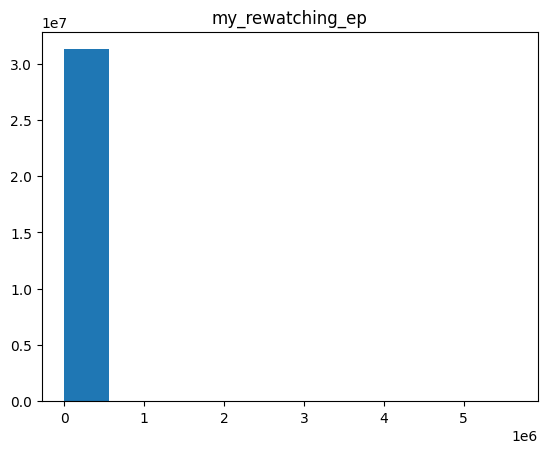

In [6]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                     anime_id  my_watched_episodes  my_score  my_status  \
anime_id             1.000000            -0.127110 -0.059648   0.001609   
my_watched_episodes -0.127110             1.000000  0.187956  -0.197414   
my_score            -0.059648             0.187956  1.000000  -0.650007   
my_status            0.001609            -0.197414 -0.650007   1.000000   
my_rewatching       -0.009914             0.005508  0.021448  -0.017334   
my_rewatching_ep    -0.000181            -0.000027  0.000064  -0.000106   

                     my_rewatching  my_rewatching_ep  
anime_id                 -0.009914         -0.000181  
my_watched_episodes       0.005508         -0.000027  
my_score                  0.021448          0.000064  
my_status                -0.017334         -0.000106  
my_rewatching             1.000000          0.000006  
my_rewatching_ep          0.000006          1.000000  


<Axes: >

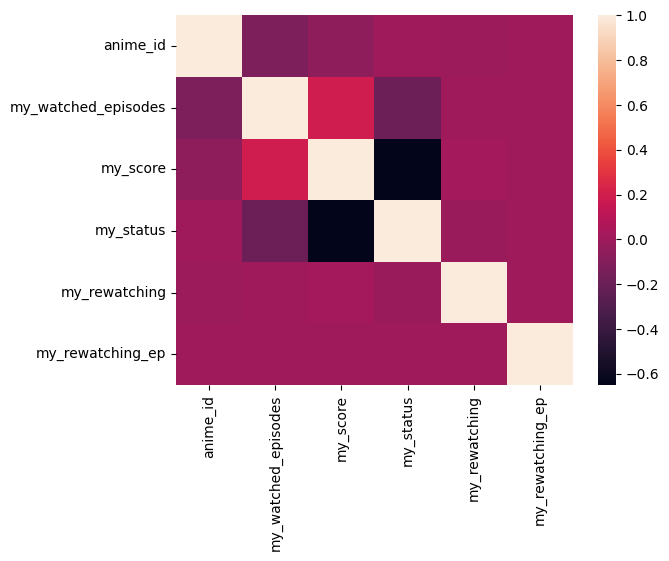

In [7]:
import seaborn as sns

print(df_num.corr())
sns.heatmap(df_num.corr())

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_anime_recommendations(anime_id, df, top_n=5):
    """
    Generates anime recommendations based on cosine similarity of synopses.

    Args:
        anime_id: The anime_id for which to get recommendations.
        df: Pandas DataFrame with 'anime_id' and 'synopsis' columns.
        top_n: The number of recommendations to return.

    Returns:
        A list of anime_id recommendations (excluding the input anime_id).
    """

    # 1. TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['synopsis'])

    # 2. Cosine Similarity Matrix
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # 3. Get Recommendations
    idx = df[df['anime_id'] == anime_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Exclude self and take top_n
    anime_indices = [i[0] for i in sim_scores]
    recommendations = df['anime_id'].iloc[anime_indices].tolist()

    return recommendations



# --- 1. Data Preprocessing --- 
anime_data = pd.read_csv("C:/Users/Harvey/Downloads/anime-with-description.csv")

# Merge DataFrames
merged_df = pd.merge(df_num, anime_data, on='anime_id')

merged_df = merged_df.dropna(subset=['anime_id'])

merged_df = merged_df.dropna(subset=['synopsis'])

anime_df = pd.DataFrame(merged_df)

anime_id_to_recommend = 1  # The anime you want recommendations for
recommended_anime = get_anime_recommendations(anime_id_to_recommend, anime_df)
print(f"Recommendations for anime_id {anime_id_to_recommend}: {recommended_anime}")

MemoryError: 